In [1]:
# Dependencies
import tweepy   # twitter api
import csv
import pandas as pd                          # data analysis (dataframes, read file)
import numpy as np                           # arrays and linear algebra
from IPython.display import display          # print output in tabular format
import matplotlib.pyplot as plt              # for 2D plotting
import nltk

In [24]:
#Read csv file into dataframe

ripple = pd.read_csv('ripple.csv', names = ["Tweets","Date","Likes","Retweets","Hashtag"])
print (ripple.head(10))

                                              Tweets            Date  Likes  \
0  b'RT @arndtpodzus: High Chance Amazon Will Par...  6/22/2018 9:48      0   
1  b'Coindesk: Zcash Pays Off Disgruntled Develop...  6/22/2018 9:48      0   
2  b'Coindesk: Korean Government to Lead 6 Blockc...  6/22/2018 9:48      0   
3  b'RT @XRP_Scheetz: XRP Validation &amp; Verifi...  6/22/2018 9:47      0   
4  b'xRapid might go trough decentralised exchang...  6/22/2018 9:47      0   
5  b'RT @arndtpodzus: High Chance Amazon Will Par...  6/22/2018 9:46      0   
6  b'RT @coinmrktairdrop: \xe2\x9c\x85\xf0\x9f\x9...  6/22/2018 9:46      0   
7  b'RT @arndtpodzus: Why Ripple thinks coinbase ...  6/22/2018 9:46      0   
8  b'Get your free $ONIONS in this newly updated ...  6/22/2018 9:46      0   
9  b'\xf0\x9f\x94\xb4$17 Billion Deleted From Cry...  6/22/2018 9:46      0   

   Retweets  Hashtag  
0         9  #Ripple  
1         0  #Ripple  
2         0  #Ripple  
3        10  #Ripple  
4         0  #R

In [25]:
## Clean and Sentiment Analysis the Tweet

from textblob import TextBlob                    # library for processing textual data          
import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    #We're returning the tweet which is cleaned(after replacin' the above pattern to null which means deleting)


def get_polarity(tweet):                         # here we're getting the polarity of each tweet after analysing it
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:          #polarity tells whether the tweet is postive or negative or neutral
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [26]:
ripple['Sentiment'] = np.array([ get_polarity(tweet) for tweet in ripple['Tweets'] ])

In [27]:
## Print top 10 tweets and notice Sentiment field added at the end of each record
print(ripple.head(10))

                                              Tweets            Date  Likes  \
0  b'RT @arndtpodzus: High Chance Amazon Will Par...  6/22/2018 9:48      0   
1  b'Coindesk: Zcash Pays Off Disgruntled Develop...  6/22/2018 9:48      0   
2  b'Coindesk: Korean Government to Lead 6 Blockc...  6/22/2018 9:48      0   
3  b'RT @XRP_Scheetz: XRP Validation &amp; Verifi...  6/22/2018 9:47      0   
4  b'xRapid might go trough decentralised exchang...  6/22/2018 9:47      0   
5  b'RT @arndtpodzus: High Chance Amazon Will Par...  6/22/2018 9:46      0   
6  b'RT @coinmrktairdrop: \xe2\x9c\x85\xf0\x9f\x9...  6/22/2018 9:46      0   
7  b'RT @arndtpodzus: Why Ripple thinks coinbase ...  6/22/2018 9:46      0   
8  b'Get your free $ONIONS in this newly updated ...  6/22/2018 9:46      0   
9  b'\xf0\x9f\x94\xb4$17 Billion Deleted From Cry...  6/22/2018 9:46      0   

   Retweets  Hashtag  Sentiment  
0         9  #Ripple          1  
1         0  #Ripple          0  
2         0  #Ripple        

In [28]:
## Classifying the tweets

positive_tweets = [ tweet for index, tweet in enumerate(ripple['Tweets']) if ripple['Sentiment'][index] > 0]
neutral_tweets = [ tweet for index, tweet in enumerate(ripple['Tweets']) if ripple['Sentiment'][index] == 0]
negative_tweets = [ tweet for index, tweet in enumerate(ripple['Tweets']) if ripple['Sentiment'][index] < 0]      

positive_data = pd.DataFrame (data = [ tweet for index, tweet in enumerate(ripple['Tweets']) if ripple['Sentiment'][index] > 0])
neutral_data = [ tweet for index, tweet in enumerate(ripple['Tweets']) if ripple['Sentiment'][index] == 0]
negative_data = [ tweet for index, tweet in enumerate(ripple['Tweets']) if ripple['Sentiment'][index] < 0] 

In [29]:
positive_data

,0
0,b'RT @arndtpodzus: High Chance Amazon Will Par...
1,b'RT @XRP_Scheetz: XRP Validation &amp; Verifi...
2,b'RT @arndtpodzus: High Chance Amazon Will Par...
3,b'Get your free $ONIONS in this newly updated ...
4,"b'Now you can buy and convert Bitcoin, Ether, ..."
5,b'More &amp; more crypto enthusiasts are chang...
6,b'RT @SalihSarikaya: What are the best #Crypto...
7,b'RT @argentasio: Decentralizing global bankin...
8,b'RT @C3_Nik: ** RESEARCH ** #xrp #ripple\n\n1...
9,"b'Securely buy, sell, transfer, and store digi..."


In [30]:
## Print the positive tweets

print(positive_tweets[:10])

["b'RT @arndtpodzus: High Chance Amazon Will Partner With Ripple (XRP) In 2018 https://t.co/V6anomK9Kp\\n\\n#Ripple #XRP #XRPTheStandard #Amazon'", "b'RT @XRP_Scheetz: XRP Validation &amp; Verification Walk Through made easy!\\nReTweet! ! !\\n#xrp #ripple #xrpcommunity\\nCredit: @wietsewind @baltaza\\xe2\\x80\\xa6'", "b'RT @arndtpodzus: High Chance Amazon Will Partner With Ripple (XRP) In 2018 https://t.co/V6anomK9Kp\\n\\n#Ripple #XRP #XRPTheStandard #Amazon'", "b'Get your free $ONIONS in this newly updated @DeepOnionx #faucet. Check this out now.\\nhttps://t.co/f7hYloIY5Y\\xe2\\x80\\xa6 https://t.co/HtkkCMomEV'", "b'Now you can buy and convert Bitcoin, Ether, Litecoin, and Ripple for free on @changefinance!\\xe2\\x80\\xa6 https://t.co/hAvE7eJ5f0'", "b'More &amp; more crypto enthusiasts are changing their tunes &amp; joining the XRP community.\\n\\nWe are winning all online pol\\xe2\\x80\\xa6 https://t.co/txr6X2LJbB'", "b'RT @SalihSarikaya: What are the best #Cryptocurrency price predi

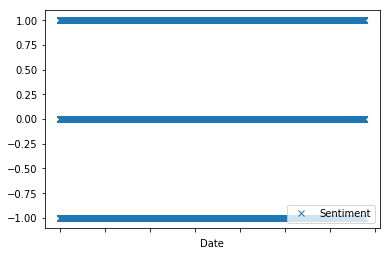

In [31]:
## Plotting sentiment points 

ripple.plot(x='Date',y='Sentiment',style='x')
plt.show()

In [32]:
sentiment_count = ripple['Sentiment'].value_counts()
sentiment_count

 0    15525
 1    14959
-1     3359
Name: Sentiment, dtype: int64

In [33]:
max_retweet = ripple[ripple['Retweets']==ripple['Retweets'].max()]
max_retweet

,Tweets,Date,Likes,Retweets,Hashtag,Sentiment
23466,"b'RT @SatoshiTokenSTO: \xf0\x9f\x94\xa5Get 55,...",6/20/2018 21:04,0,2845,#xrp,1
24030,"b'RT @SatoshiTokenSTO: \xf0\x9f\x94\xa5Get 55,...",6/20/2018 18:09,0,2845,#xrp,1
24281,"b'RT @SatoshiTokenSTO: \xf0\x9f\x94\xa5Get 55,...",6/20/2018 16:27,0,2845,#xrp,1
25005,"b'RT @SatoshiTokenSTO: \xf0\x9f\x94\xa5Get 55,...",6/20/2018 12:24,0,2845,#xrp,1
25791,"b'RT @SatoshiTokenSTO: \xf0\x9f\x94\xa5Get 55,...",6/20/2018 7:25,0,2845,#xrp,1
26059,"b'RT @SatoshiTokenSTO: \xf0\x9f\x94\xa5Get 55,...",6/20/2018 5:47,0,2845,#xrp,1
26449,"b'RT @SatoshiTokenSTO: \xf0\x9f\x94\xa5Get 55,...",6/20/2018 3:19,0,2845,#xrp,1
27034,"b'RT @SatoshiTokenSTO: \xf0\x9f\x94\xa5Get 55,...",6/19/2018 23:44,0,2845,#xrp,1
27632,"b'RT @SatoshiTokenSTO: \xf0\x9f\x94\xa5Get 55,...",6/19/2018 20:42,0,2845,#xrp,1
28321,"b'RT @SatoshiTokenSTO: \xf0\x9f\x94\xa5Get 55,...",6/19/2018 17:14,0,2845,#xrp,1


In [34]:
ripple['Hashtag'].value_counts()

#Ripple    18044
#xrp       15799
Name: Hashtag, dtype: int64

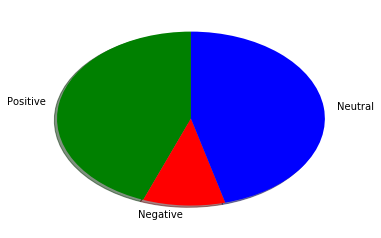

In [35]:
sizes = [len(positive_tweets), len(negative_tweets), len(neutral_tweets)]
colors = ['green', 'red', 'blue']
labels = 'Positive', 'Negative', 'Neutral'

plt.pie(
   x=sizes,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90
)

#plt.title("Sentiment of {} Tweets about {}".format(number, query))
plt.show()

In [36]:
# Let us test whether sentiment analysis is done correctly. Print sixth tweet.

ripple["Tweets"][6]

"b'RT @coinmrktairdrop: \\xe2\\x9c\\x85\\xf0\\x9f\\x93\\x88eCoinomic (CNC)\\xe2\\x9c\\x88\\xef\\xb8\\x8f\\xf0\\x9f\\x93\\xa2NEW Airdrop \\n1. Join https://t.co/eOQ7kaVdRh\\n2. Like \\n3.Retweet \\n4.ETH address\\n400 token - 28$\\n#ai\\xe2\\x80\\xa6'"

In [37]:
ripple["Sentiment"][6]

0

In [38]:
positive_data.columns = ['Text']

In [39]:
import string
from collections import Counter
from nltk.tokenize import TweetTokenizer #specially to handle tweets into documents
from nltk.corpus import stopwords # to remove stop words like is, was etc...
import nltk
nltk.download('stopwords')
from nltk.corpus import wordnet

def process(text, tokenizer=TweetTokenizer(), stopwords=[]):
    #text = text.lower() # for normalization
    text = ' '.join(text).lower()
    tokens = tokenizer.tokenize(text)
    return [tok for tok in tokens if not tok in stopwords and not tok.isdigit()]

#fname = "C:\\Users\\saraf\\Desktop\\CBA\\Term 1\\Practicum\\IPL\\output1.jsonl"
tweet_tokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopword_list = stopwords.words('english') + punct + ['rt','via', '...']
tf = Counter()
tokens = process(text=positive_data['Text'],tokenizer=tweet_tokenizer,stopwords=stopword_list)
tf.update(tokens)
for tag, count in tf.most_common(50):
        print("{}: {}".format(tag, count))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saraf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
xe2: 15757
x80: 14700
xa6: 12341
n: 11952
b'rt: 9110
#ripple: 4348
#xrp: 4284
b: 2824
x9f: 2607
xf0: 2591
tokens: 2401
xrp: 2283
ripple: 1975
nhttps: 1851
:/: 1848
#blockchain: 1669
#btc: 1647
kok: 1598
free: 1584
#airdrop: 1485
live: 1479
token: 1471
xef: 1393
get: 1311
@c3_nik: 1296
airdrop: 1273
usd: 1264
price: 1117
#crypto: 1116
new: 1104
#iota: 1089
b'kokos: 1073
#bitcoin: 1072
x99s: 1066
#xvg: 1041
#cryptocurrency: 1005
first: 988
@qurrex: 957
#qurrex: 938
#eth: 911
:\: 845
market: 841
xb8: 830
#ethereum: 822
like: 782
best: 770
community: 719
july: 710
x94: 705
#xrpthestandard: 687


In [40]:
from nltk.tokenize import wordpunct_tokenize
from subprocess import check_output

def process(text, tokenizer=TweetTokenizer(), stopwords=[]):
    #text = text.lower() # for normalization
    text = ' '.join(text).lower()
    tokens = tokenizer.tokenize(text)
    return [tok for tok in tokens if not tok in stopwords and not tok.isdigit()]

#fname = "C:\\Users\\saraf\\Desktop\\CBA\\Term 1\\Practicum\\IPL\\output1.jsonl"
tweet_tokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopword_list = stopwords.words('english') + punct + ['b','n','co','versaratrade','rt','via', '...','b\'rt','https','#versaratrade','@versaratrade','@', '#', 'amp', 'http', '/', '://', '_',]
series_tweets = positive_data['Text']
tweet_str = series_tweets.str.cat(sep = ' ')
list_of_words = [i.lower() for i in wordpunct_tokenize(tweet_str) if i.lower() not in stopword_list and i.isalpha()]
wordfreqdist = nltk.FreqDist(list_of_words)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)


[('ripple', 7015), ('xrp', 6689), ('airdrop', 2787), ('tokens', 2403), ('blockchain', 2185), ('btc', 2096), ('qurrex', 1895), ('nhttps', 1865), ('bitcoin', 1841), ('eth', 1700), ('free', 1648), ('kok', 1599), ('crypto', 1581), ('live', 1519), ('token', 1497), ('xef', 1394), ('get', 1321), ('usd', 1267), ('cryptocurrency', 1248), ('new', 1143), ('iota', 1141), ('price', 1121), ('kokos', 1099), ('xvg', 1053), ('first', 989), ('ethereum', 959), ('market', 845), ('exchange', 835), ('like', 796), ('best', 789), ('join', 789), ('ico', 767), ('community', 723), ('july', 710), ('xrpcommunity', 696), ('xrpthestandard', 693), ('xbf', 651), ('great', 646), ('eos', 638), ('trx', 576), ('analysis', 576), ('ltc', 574), ('prediction', 547), ('system', 532), ('mins', 507), ('one', 504), ('bankxrp', 487), ('nfree', 485), ('built', 485), ('kokostoken', 484)]


In [41]:
mostcom = str(mostcommon)

In [42]:
data_new = pd.DataFrame(mostcommon, columns = ['word','frequency'])
data_new.head(10)

,word,frequency
0,ripple,7015
1,xrp,6689
2,airdrop,2787
3,tokens,2403
4,blockchain,2185
5,btc,2096
6,qurrex,1895
7,nhttps,1865
8,bitcoin,1841
9,eth,1700


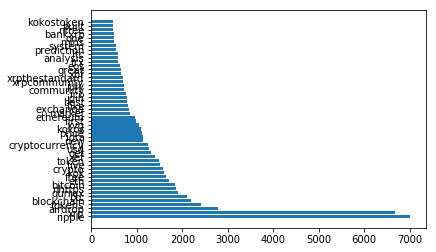

In [43]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

(-0.5, 399.5, 199.5, -0.5)

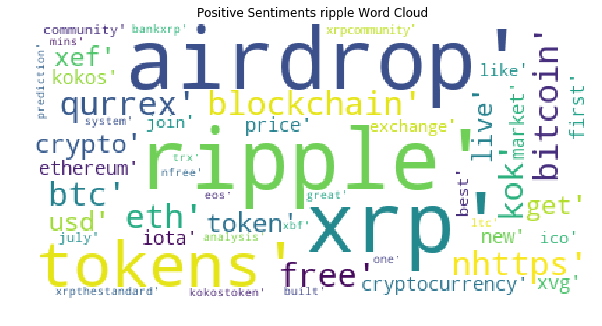

In [44]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=60
                      , background_color="white"
                      , stopwords=stopword_list
                      , collocations=False).generate(mostcom)

# Display the generated image with matplotlib 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title('Positive Sentiments ripple Word Cloud')
plt.savefig("wordcloud_ripple.png")
plt.axis("off")